1. REQUIREMENTS

In [2]:
# !pip install pandas
# !pip install matplotlib
# !pip install statsmodels
# !pip install seaborn

2. IMPORT LIBRARIES

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

3. ANALYSIS

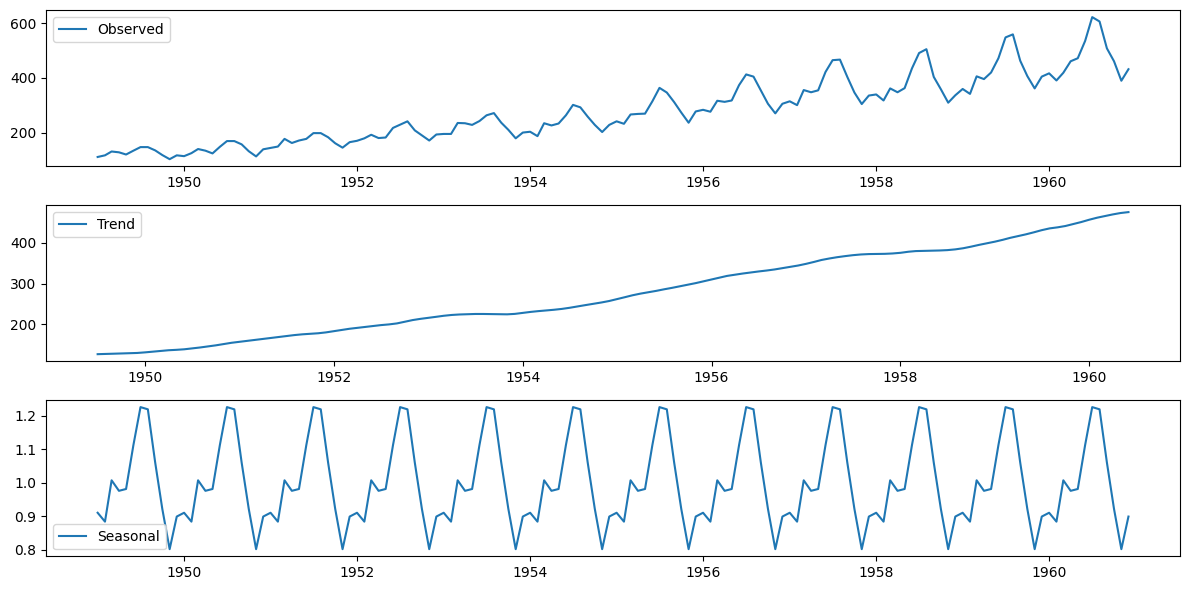

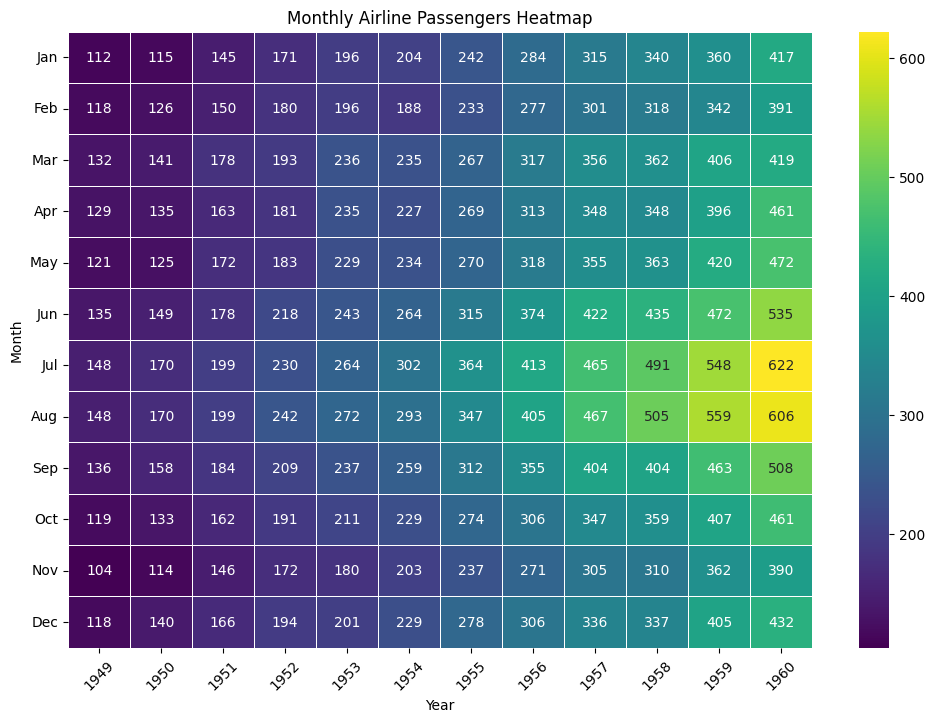

In [13]:


# Load the dataset
df = pd.read_csv('C:/Users/manue/OneDrive/Escritorio/ESTUDIO/PROGRAMACIÓN/PYTHON/airlinedata/data/airline-passengers.csv', parse_dates=['month'])

# Reset index to avoid ambiguity
df = df.set_index('month')

# Ensure the month column is in a format that allows for sorting
df['month_name'] = df.index.month_name().str.slice(stop=3)  # Get the month names in three-letter format
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)  # Convert to categorical with specified order

# Decompose the time series
decompose_result = seasonal_decompose(df['total_passengers'], model='multiplicative', period=12)

# Plot the seasonal decomposition
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(decompose_result.observed, label='Observed')
plt.legend()

plt.subplot(312)
plt.plot(decompose_result.trend, label='Trend')
plt.legend()

plt.subplot(313)
plt.plot(decompose_result.seasonal, label='Seasonal')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for seasonal analysis
df['year'] = df.index.year

heatmap_data = df.pivot_table(values='total_passengers', index='month_name', columns='year', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", linewidths=0.5, linecolor='white')
plt.title('Monthly Airline Passengers Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
